In [1]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import json
from normalizer import subSample, getDataFromJSON, magDict
# Device configuration - If you have CUDA configured, you must use it. Try training with CPU and observe what happens
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Setting a seed for torch
torch.manual_seed(195322) 

/home/robjohnson/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
# This file has 77270 data points. 
%time train1, labels1 = subSample(path="data/train_partition1_data.json", device=device, earlyStop=5000)

Now reading data/train_partition1_data.json
Now loading event 1/785
Now loading event 101/785
Now loading event 201/785
Now loading event 301/785
Now loading event 401/785
Now loading event 501/785
Now loading event 601/785
Now loading event 701/785
785 lines loaded.
CPU times: user 24.1 s, sys: 3.5 s, total: 27.6 s
Wall time: 27.6 s


In [3]:
# This file has 93767 data points. 
%time train2, labels2 = subSample(path="data/train_partition2_data.json",device=device, earlyStop=5000)

Now reading data/train_partition2_data.json
Now loading event 1/300
Now loading event 101/300
Now loading event 201/300
300 lines loaded.
CPU times: user 18.3 s, sys: 2.32 s, total: 20.6 s
Wall time: 20.7 s


In [4]:
# This file has 42986 data points. 
%time train3, labels3 = subSample(path="data/train_partition3_data.json",device=device, earlyStop=5000)

Now reading data/train_partition3_data.json
Now loading event 1/585
Now loading event 101/585
Now loading event 201/585
Now loading event 301/585
Now loading event 401/585
Now loading event 501/585
585 lines loaded.
CPU times: user 15.7 s, sys: 1.01 s, total: 16.7 s
Wall time: 16.8 s


In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
t1 = [[train1[i, j, :].cpu().numpy().mean() for j in range(train1[i, :, :].shape[0])] for i in range(train1.shape[0])]
t1 = np.array(t1)
t2 = [[train2[i, j, :].cpu().numpy().mean() for j in range(train2[i, :, :].shape[0])] for i in range(train2.shape[0])]
t2 = np.array(t2)
t3 = [[train3[i, j, :].cpu().numpy().mean() for j in range(train3[i, :, :].shape[0])] for i in range(train3.shape[0])]
t3 = np.array(t3)

In [7]:
y = labels1 + labels2+ labels3

In [8]:
X = pd.DataFrame(np.concatenate([t1,t2,t3], axis = 0), columns = magDict.keys())
X

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,R_VALUE,RBZ_VALUE,RBT_VALUE,RBP_VALUE,FDIM,BZ_FDIM,BT_FDIM,BP_FDIM,PIL_LEN,XR_MAX
0,0.251178,0.108902,0.057403,0.186386,0.058035,0.104399,0.213416,0.795626,0.088050,0.428976,...,0.594951,0.650945,0.763426,0.779017,0.000000,0.000000,0.001109,0.000555,0.002089,1.0
1,0.928854,0.978016,0.935898,0.503620,0.029742,0.040022,0.965847,0.218463,0.533194,0.731627,...,0.969495,0.957337,0.978677,0.957045,0.045621,0.000604,0.001511,0.000000,0.338611,1.0
2,0.047425,0.018490,0.007736,0.036613,0.013319,0.037873,0.046168,0.941353,0.044386,0.282542,...,0.000000,0.007100,0.014563,0.228050,0.000000,0.000000,0.003272,0.003927,0.000015,1.0
3,0.500149,0.370346,0.421686,0.288574,0.255026,0.101627,0.294557,0.940354,0.657008,0.951518,...,0.848737,0.881100,0.932309,0.959493,0.000000,0.000000,0.007952,0.004418,0.031931,1.0
4,0.073978,0.047823,0.029602,0.049111,0.041724,0.017830,0.078568,0.906689,0.151590,0.475566,...,0.639099,0.476250,0.713423,0.679096,0.000000,0.000000,0.004251,0.002550,0.001725,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,0.391405,0.422225,0.013115,0.549050,0.301481,0.426263,0.492629,0.559612,0.000017,0.685070,...,0.895223,0.917108,0.925848,0.925949,0.000000,0.000000,0.002136,0.001068,0.045817,1.0
1666,0.305280,0.358803,0.009834,0.394596,0.226871,0.266708,0.437317,0.497304,0.000015,0.576634,...,0.925022,0.928219,0.895150,0.872890,0.000000,0.002505,0.006546,0.002014,0.143824,1.0
1667,0.013989,0.012734,0.000245,0.021759,0.010582,0.009716,0.018733,0.910559,0.000007,0.505456,...,0.000000,0.000000,0.607527,0.601435,0.000000,0.000000,0.005286,0.009515,0.000024,1.0
1668,0.629187,0.948656,0.037717,0.909212,0.675708,0.643785,0.741690,0.687924,0.000031,0.890291,...,0.871085,0.897889,0.953355,0.950322,0.000000,0.000178,0.002006,0.000000,0.056383,1.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        80
           1       0.56      0.67      0.61        75
           2       0.51      0.43      0.47        93
           3       0.53      0.57      0.55        80
           4       0.92      0.68      0.78        90

    accuracy                           0.66       418
   macro avg       0.66      0.66      0.65       418
weighted avg       0.67      0.66      0.65       418



In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6555023923444976

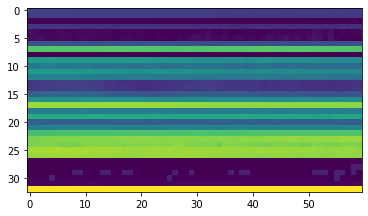

In [14]:
plt.imshow(train2[1])
plt.show()

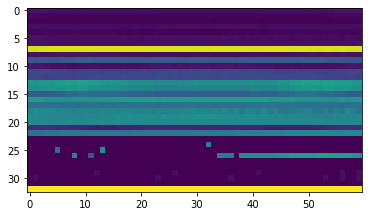

In [15]:
plt.imshow(train1[2])
plt.show()

In [17]:

from datetime import datetime

def tester(model, pathToWrite=None):
        if pathToWrite is None:
                pathToWrite = f'results/submission{datetime.now().strftime("%d_%H:%M")}.csv'
        # Get test data
        test, ids = getDataFromJSON(path='data/test_4_5_data.json', test=True, device=device)
        # get our guesses from the network
        guesses = model.predict(test)
#         assert len(ids) == guesses.shape
        # Open a file to write to
        file = open(pathToWrite, mode='w')
        print('Id,Label', file=file)
        for i in range(len(ids)):
                print(ids[i], guesses[i], sep=',', file=file)
        file.close()

tester(model)

Now reading data/test_4_5_data.json
Now loading event 0/159507
Now loading event 100/159507
Now loading event 200/159507
Now loading event 300/159507
Now loading event 400/159507
Now loading event 500/159507
Now loading event 600/159507
Now loading event 700/159507
Now loading event 800/159507
Now loading event 900/159507
Now loading event 1000/159507
Now loading event 1100/159507
Now loading event 1200/159507
Now loading event 1300/159507
Now loading event 1400/159507
Now loading event 1500/159507
Now loading event 1600/159507
Now loading event 1700/159507
Now loading event 1800/159507
Now loading event 1900/159507
Now loading event 2000/159507
Now loading event 2100/159507
Now loading event 2200/159507
Now loading event 2300/159507
Now loading event 2400/159507
Now loading event 2500/159507
Now loading event 2600/159507
Now loading event 2700/159507
Now loading event 2800/159507
Now loading event 2900/159507
Now loading event 3000/159507
Now loading event 3100/159507
Now loading even

Now loading event 26700/159507
Now loading event 26800/159507
Now loading event 26900/159507
Now loading event 27000/159507
Now loading event 27100/159507
Now loading event 27200/159507
Now loading event 27300/159507
Now loading event 27400/159507
Now loading event 27500/159507
Now loading event 27600/159507
Now loading event 27700/159507
Now loading event 27800/159507
Now loading event 27900/159507
Now loading event 28000/159507
Now loading event 28100/159507
Now loading event 28200/159507
Now loading event 28300/159507
Now loading event 28400/159507
Now loading event 28500/159507
Now loading event 28600/159507
Now loading event 28700/159507
Now loading event 28800/159507
Now loading event 28900/159507
Now loading event 29000/159507
Now loading event 29100/159507
Now loading event 29200/159507
Now loading event 29300/159507
Now loading event 29400/159507
Now loading event 29500/159507
Now loading event 29600/159507
Now loading event 29700/159507
Now loading event 29800/159507
Now load

Now loading event 53200/159507
Now loading event 53300/159507
Now loading event 53400/159507
Now loading event 53500/159507
Now loading event 53600/159507
Now loading event 53700/159507
Now loading event 53800/159507
Now loading event 53900/159507
Now loading event 54000/159507
Now loading event 54100/159507
Now loading event 54200/159507
Now loading event 54300/159507
Now loading event 54400/159507
Now loading event 54500/159507
Now loading event 54600/159507
Now loading event 54700/159507
Now loading event 54800/159507
Now loading event 54900/159507
Now loading event 55000/159507
Now loading event 55100/159507
Now loading event 55200/159507
Now loading event 55300/159507
Now loading event 55400/159507
Now loading event 55500/159507
Now loading event 55600/159507
Now loading event 55700/159507
Now loading event 55800/159507
Now loading event 55900/159507
Now loading event 56000/159507
Now loading event 56100/159507
Now loading event 56200/159507
Now loading event 56300/159507
Now load

Now loading event 79700/159507
Now loading event 79800/159507
Now loading event 79900/159507
Now loading event 80000/159507
Now loading event 80100/159507
Now loading event 80200/159507
Now loading event 80300/159507
Now loading event 80400/159507
Now loading event 80500/159507
Now loading event 80600/159507
Now loading event 80700/159507
Now loading event 80800/159507
Now loading event 80900/159507
Now loading event 81000/159507
Now loading event 81100/159507
Now loading event 81200/159507
Now loading event 81300/159507
Now loading event 81400/159507
Now loading event 81500/159507
Now loading event 81600/159507
Now loading event 81700/159507
Now loading event 81800/159507
Now loading event 81900/159507
Now loading event 82000/159507
Now loading event 82100/159507
Now loading event 82200/159507
Now loading event 82300/159507
Now loading event 82400/159507
Now loading event 82500/159507
Now loading event 82600/159507
Now loading event 82700/159507
Now loading event 82800/159507
Now load

Now loading event 106000/159507
Now loading event 106100/159507
Now loading event 106200/159507
Now loading event 106300/159507
Now loading event 106400/159507
Now loading event 106500/159507
Now loading event 106600/159507
Now loading event 106700/159507
Now loading event 106800/159507
Now loading event 106900/159507
Now loading event 107000/159507
Now loading event 107100/159507
Now loading event 107200/159507
Now loading event 107300/159507
Now loading event 107400/159507
Now loading event 107500/159507
Now loading event 107600/159507
Now loading event 107700/159507
Now loading event 107800/159507
Now loading event 107900/159507
Now loading event 108000/159507
Now loading event 108100/159507
Now loading event 108200/159507
Now loading event 108300/159507
Now loading event 108400/159507
Now loading event 108500/159507
Now loading event 108600/159507
Now loading event 108700/159507
Now loading event 108800/159507
Now loading event 108900/159507
Now loading event 109000/159507
Now load

Now loading event 131700/159507
Now loading event 131800/159507
Now loading event 131900/159507
Now loading event 132000/159507
Now loading event 132100/159507
Now loading event 132200/159507
Now loading event 132300/159507
Now loading event 132400/159507
Now loading event 132500/159507
Now loading event 132600/159507
Now loading event 132700/159507
Now loading event 132800/159507
Now loading event 132900/159507
Now loading event 133000/159507
Now loading event 133100/159507
Now loading event 133200/159507
Now loading event 133300/159507
Now loading event 133400/159507
Now loading event 133500/159507
Now loading event 133600/159507
Now loading event 133700/159507
Now loading event 133800/159507
Now loading event 133900/159507
Now loading event 134000/159507
Now loading event 134100/159507
Now loading event 134200/159507
Now loading event 134300/159507
Now loading event 134400/159507
Now loading event 134500/159507
Now loading event 134600/159507
Now loading event 134700/159507
Now load

ValueError: Found array with dim 3. Estimator expected <= 2.